## Hotel demand analysis and cancellation prediction

Use cases/objectives
1. Identify & analyse hotel booking preferences, significant features and patterns
2. Indentify significant features related to booking cancellations

Assume dataset is as in - https://www.sciencedirect.com/science/article/pii/S2352340918315191

In [1]:
import datetime as dt
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from os.path import abspath
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

scaler_pwr = MinMaxScaler()

In [2]:
# Read and get data info

df = pd.read_csv(abspath('../Data/hotel_bookings.csv'))
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
# Sample dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


### Data exploration

In [5]:
# Check duplicate data
df.duplicated().sum()

31994

In [6]:
# Remove duplicated data, keep the first row
df.drop_duplicates(inplace = True)

In [7]:
# Check missing/null value
df.isnull().sum().sort_values(ascending = False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [8]:
# Check missing/null value in %

round((df.isnull().sum().sort_values(ascending = False) * 100) / len(df), 2)

company                           93.98
agent                             13.95
country                            0.52
children                           0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
hotel                              0.00
previous_cancellations             0.00
days_in_waiting_list               0.00
customer_type                      0.00
adr                                0.00
required_car_parking_spaces        0.00
total_of_special_requests          0.00
reservation_status                 0.00
previous_bookings_not_canceled     0.00
is_repeated_guest                  0.00
is_canceled                        0.00
distribution_channel               0.00
market_segment                     0.00
meal                               0.00
babies                             0.00
adults                             0.00
stays_in_week_nights               0.00


Based on the missing or null value information, the company and agent are the largest missing value. It is assume that the bookings are made directly by the customer. Therefore, the null values for the company and agent are set to 0.

As for the country value, the null value is small (0.52%). Thus, it is safe to assumed that the value can be replaced with the country with highest count.

Meanwhile, the null value for the children is replaced with 0 assuming there are no children information required by the bookings.

In [9]:
# Data cleaing

# Replace company, agent & children missing/null value with 0, country missing/null value with most frequent inflow country/mode
df.fillna(value = {'company': 0, 'agent':0, 'children':0, 'country':df['country'].mode()[0]}, inplace = True)

# verify no missing value
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [10]:
# Check primary/categorical features unique values

features = ['hotel', 'is_canceled', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', \
    'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']

print(f"Unique values by features\n")

for feature in features:
    unique_values = df[feature].unique()
    print(f"{feature}:\n {unique_values}\n")

Unique values by features

hotel:
 ['Resort Hotel' 'City Hotel']

is_canceled:
 [0 1]

meal:
 ['BB' 'FB' 'HB' 'SC' 'Undefined']

country:
 ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA' 'KHM'
 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA

Based on the information, the meal value 'Undefined' is invalid. Since the meal is not defined, it is assumed as self-catered 'SC' as described in https://www.sciencedirect.com/science/article/pii/S2352340918315191

As for the distribution_channel, the 'undefined' value is assumed to be 'Direct' booking

In [11]:
# Replace meal category from 'Undefined' to 'SC'

df['meal'].replace(to_replace = 'Undefined', value = 'SC', inplace = True)
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [12]:
# Replace meal category from 'Undefined' to 'SC'

df['distribution_channel'].replace(to_replace = 'Undefined', value = 'Direct', inplace = True)
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'GDS'], dtype=object)

In [13]:
# Perform EDA to check data validity & outliers

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Looking at the data description, there is 0 value for the adult feature (min == 0). Intuitively, it is assumed invalid as adult is required for the all the bookings.

In [14]:
# Remove invalid data

# Reservation with 0 adult
df.drop(df[df['adults'] == 0].index, inplace = True)


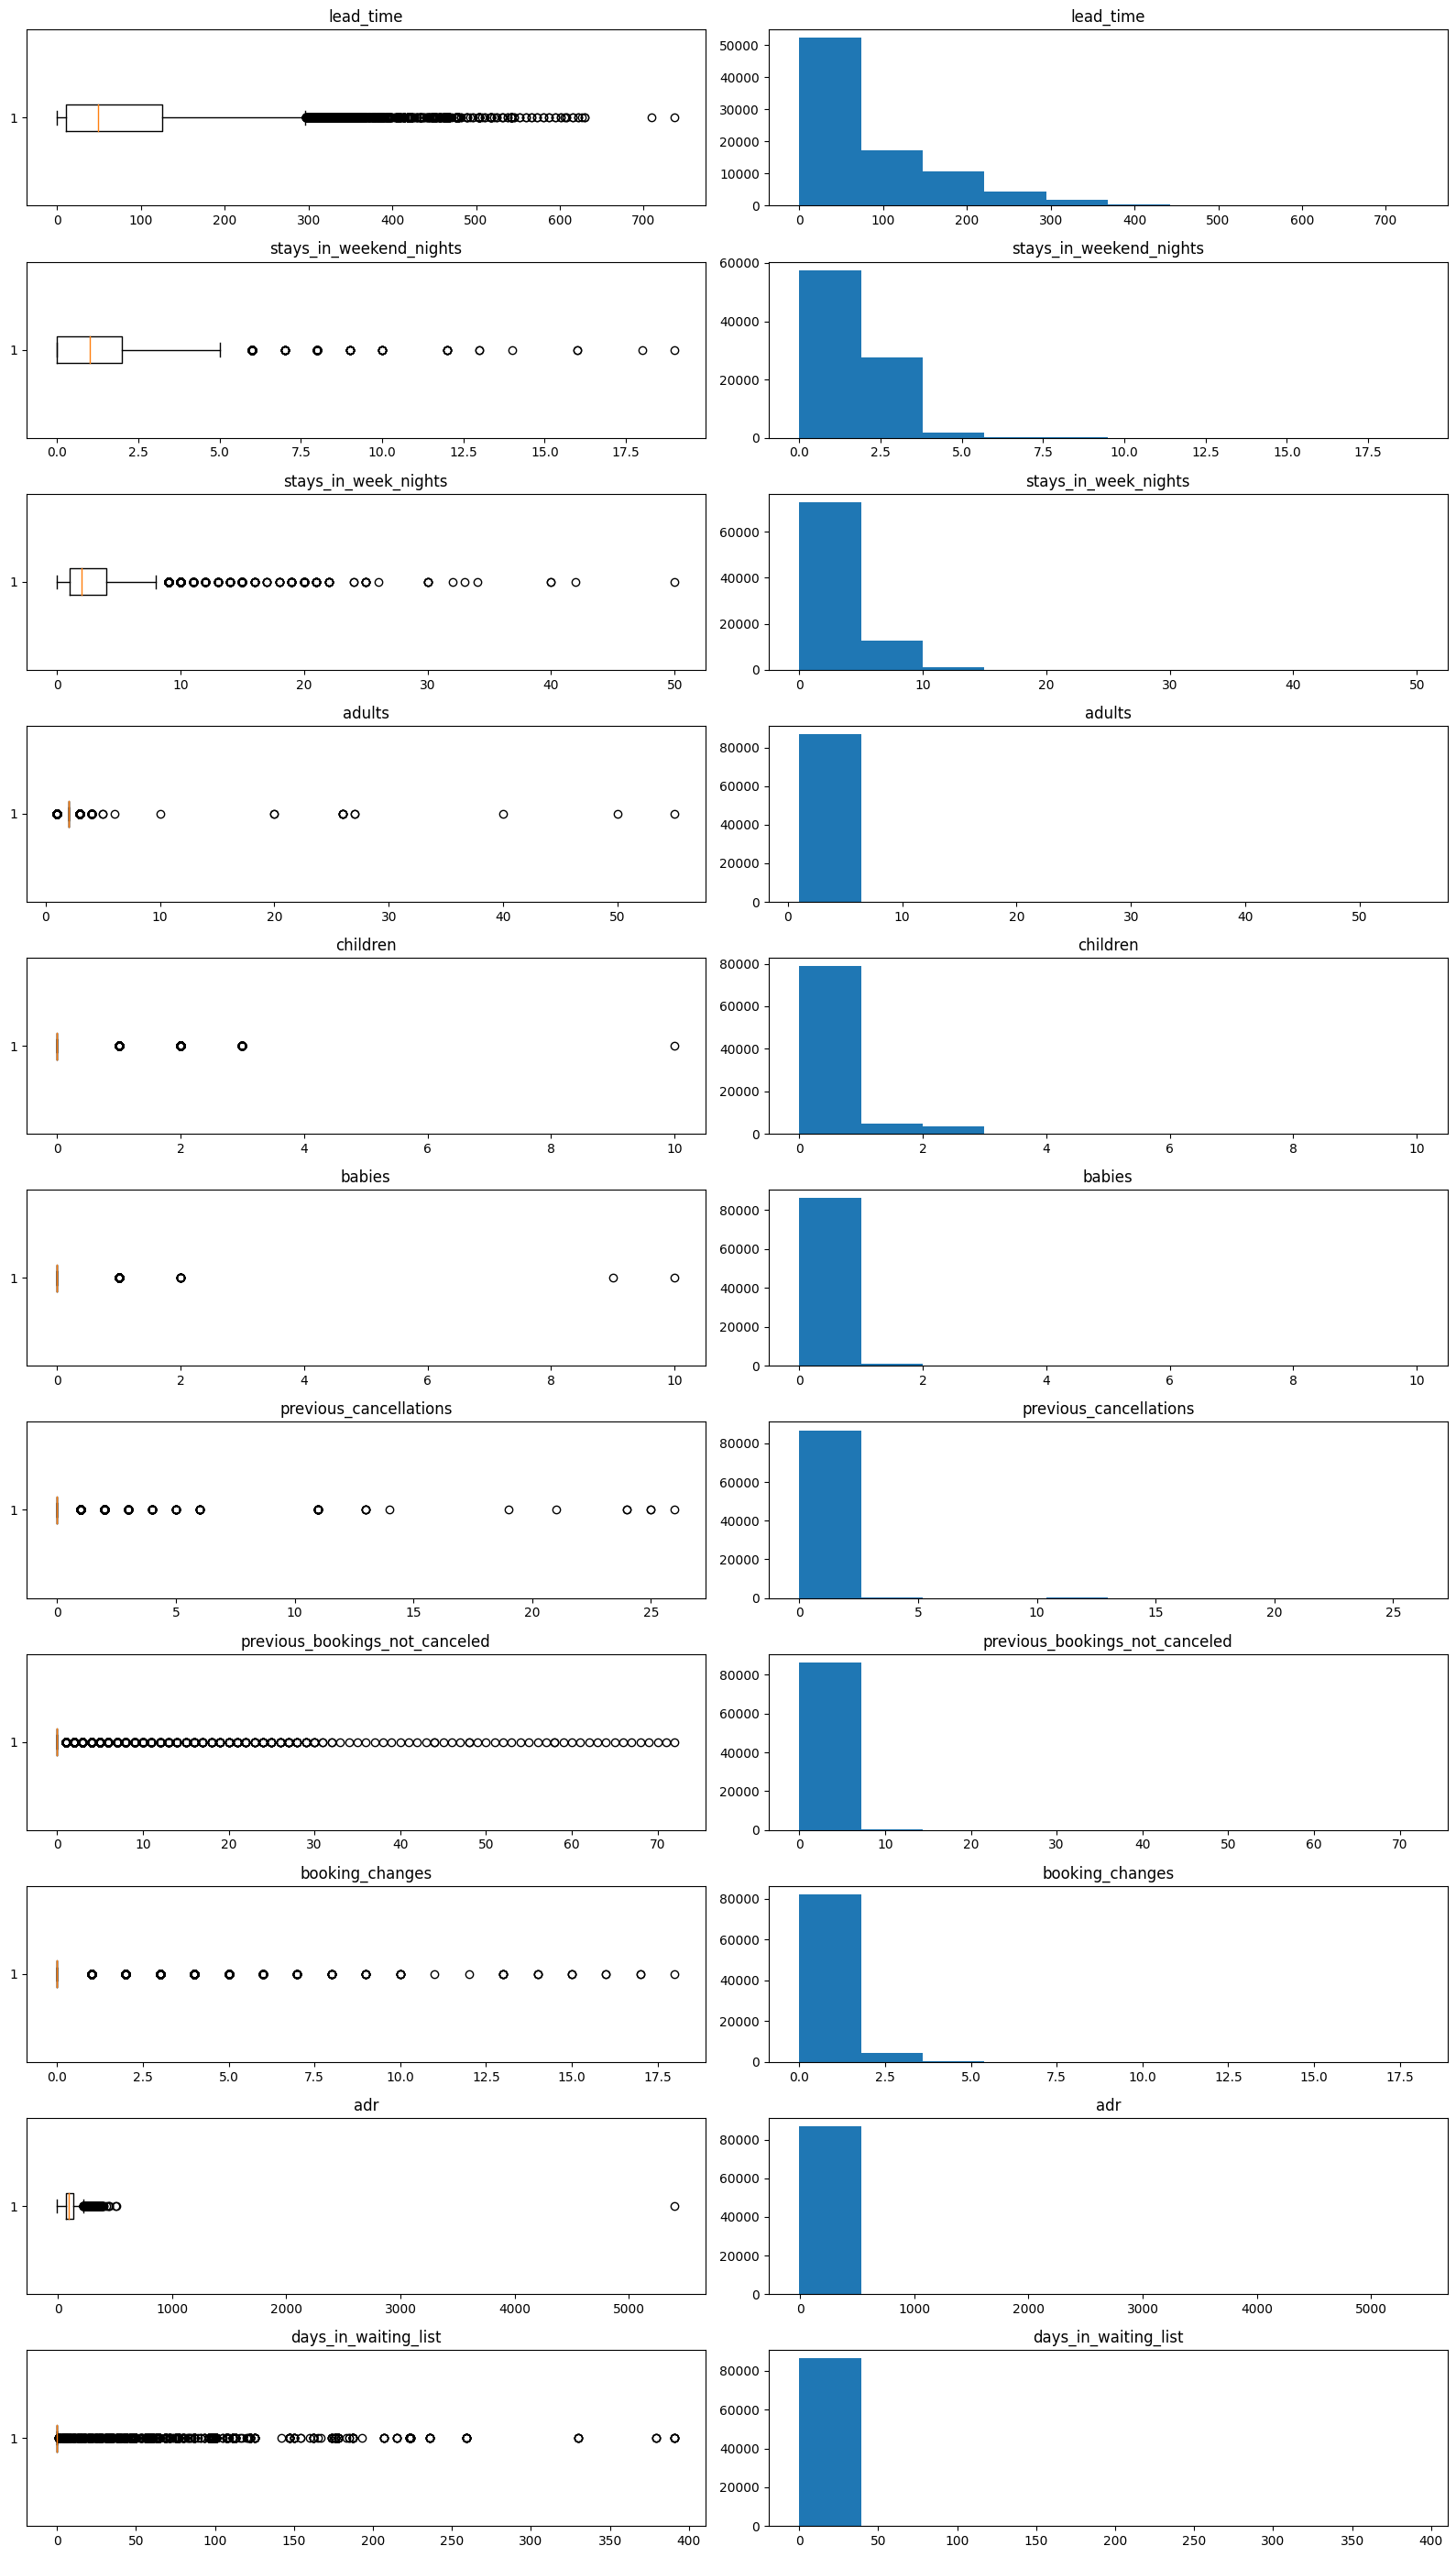

In [15]:
# Visualise data based on described() & valid data

features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', \
    'previous_bookings_not_canceled', 'booking_changes', 'adr', 'days_in_waiting_list']

n = 1

plt.figure(figsize = (16, 28))

for feature in features:
    plt.subplot(11,2,n)
    plt.boxplot(df[feature], vert = False)
    plt.title(f'{feature}')
    n = n + 1
    
    plt.subplot(11,2,n)
    plt.hist(df[feature])
    plt.title(f'{feature}')
    n = n + 1
    plt.tight_layout()

Based on the boxplot, there are obvious outliers in the dataset represented by the extreme values plotted. However, in order to make it more clear, the data need to be splitted into the city hotel and resort hotel dataset. This is because of the different hotel are usually reflected with different features value and patterns due to different business model.

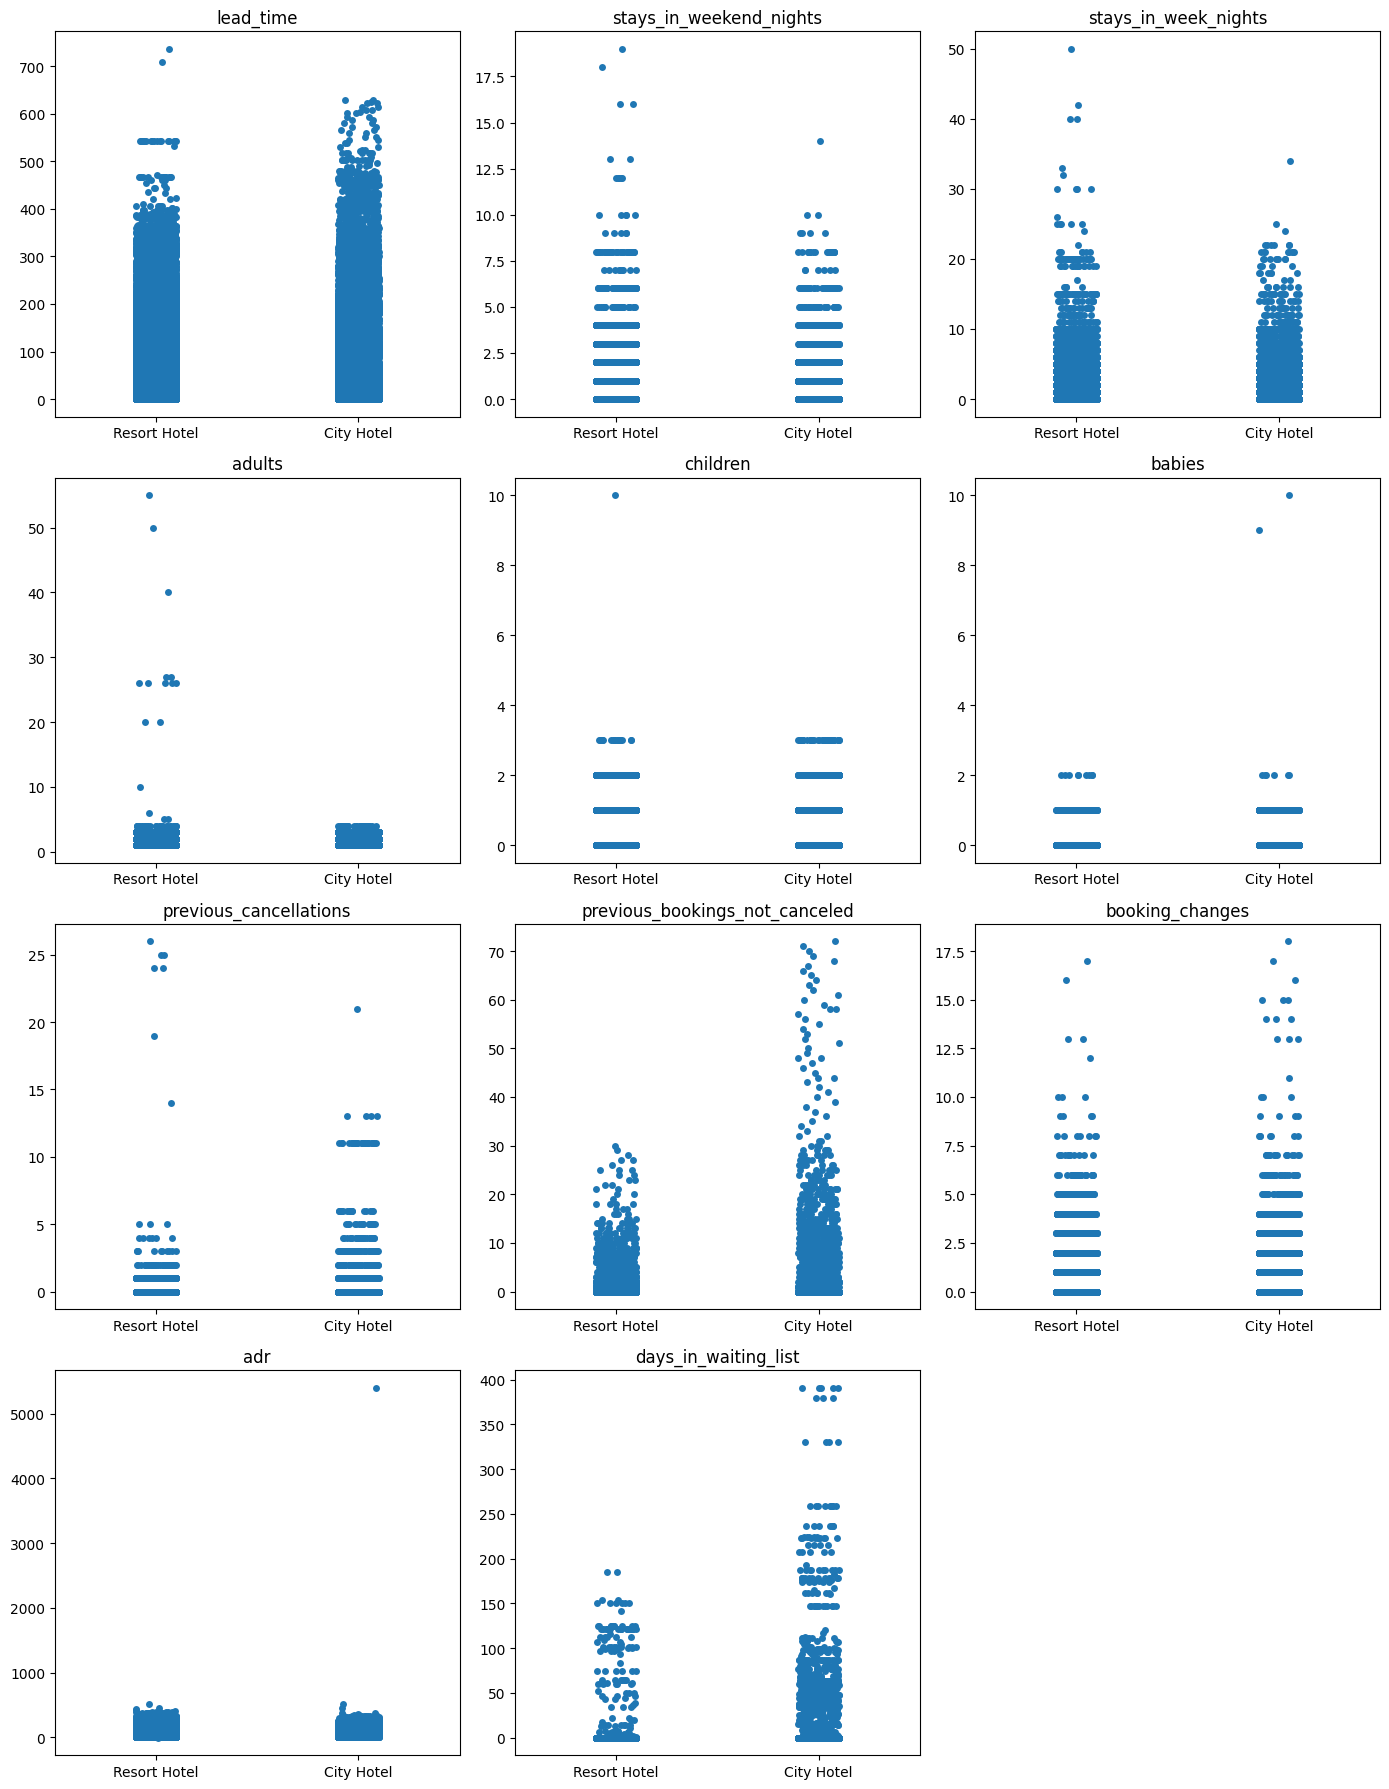

In [16]:
# Visualize differences in data distribution between city and resort hotels

n = 1

plt.figure(figsize = (14, 18))

for feature in features:
    plt.subplot(4,3,n)
    sns.stripplot(x = df['hotel'], y = df[feature]).set(xlabel = None, ylabel = None)
    plt.title(f'{feature}')
    n = n + 1
    plt.tight_layout()

The stripplot provides a good visualization regarding the different hotel types & related dataset patterns.

1. For the lead_time, we can see that the dataset for the resort hotel is getting more scattered at value above 400 days. In reference to the boxplot & histogram, the dispersion started at approximately 380 days.

2. For stays_in_weekend_nights and stay_in_week_nights, the dataset is scattered for data value above 6 and 10 for both hotel types

3. For adult, the scattered dataset is only for resort hotel though in small amout. The type of room is unknowns therefore we generalise the max number of adult per room per booking to be 4.

4. For children & babies, the extreme values are considered as outliers thus set as 0.

5. For previous_cancellations & previous_bookings_not_canceled, the features are converted into categorical where 0 is for never happens and 1 where it happens at least once.

6. For booking changes, it is assumed that booking changes only occur up to 6 times.

7. For adr, there is an obvious 1 outlier for city hotel.

8. For days_in_waiting_list, commonly it is unusual for waiting list of more than 1 days.

In [17]:
# Handle outliers based on boxplot information and assumptons

df.loc[df['lead_time'] > 380, ['lead_time']] = 380
df.loc[df['stays_in_weekend_nights'] > 6, ['stays_in_weekend_nights']] = 6
df.loc[df['stays_in_week_nights'] > 10, ['stays_in_week_nights']] = 10
df.loc[df['adults'] > 4, ['adults']] = 4
df.loc[df['children'] > 3, ['children']] = 0
df.loc[df['babies'] > 2, ['babies']] = 0
df.loc[df['previous_cancellations'] > 0, ['previous_cancellations']] = 1
df.loc[df['previous_bookings_not_canceled'] > 0, ['previous_bookings_not_canceled']] = 1
df.loc[df['booking_changes'] > 6, ['booking_changes']] = 5
df.loc[df['days_in_waiting_list'] > 0, ['days_in_waiting_list']] = 1

# Drop dataset for adr with outlier value
df.drop(df[df['adr'] == 5400].index, inplace = True)

### Data preparation

In [18]:
# Change data type to string
df['is_canceled'] = df['is_canceled'].astype('str')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('str')
df['arrival_date_year'] = df['arrival_date_year'].astype('str')
df['arrival_date_month'] = df['arrival_date_month'].astype('str')
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('str')

# Data preparation

# Total nights per booking
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Create new 'family' feature for adult, children & baby group
df['family'] = np.where(df['children'] +  df['babies'] > 0, '1', '0')

# Convert month in datetime format
df['arrival_date'] = df['arrival_date_day_of_month'] + '-' + df['arrival_date_month'] + '-' + df['arrival_date_year']
df['arrival_date'] = pd.to_datetime(df['arrival_date'], dayfirst= True)
df['arrival_date_month'] = df['arrival_date'].dt.month

# Confirmed bookings dataset
confirmed_bookings = df[df['is_canceled'] == '0']

# Canceled bookings dataset
canceled_bookings = df[df['is_canceled'] == '1']

### EDA

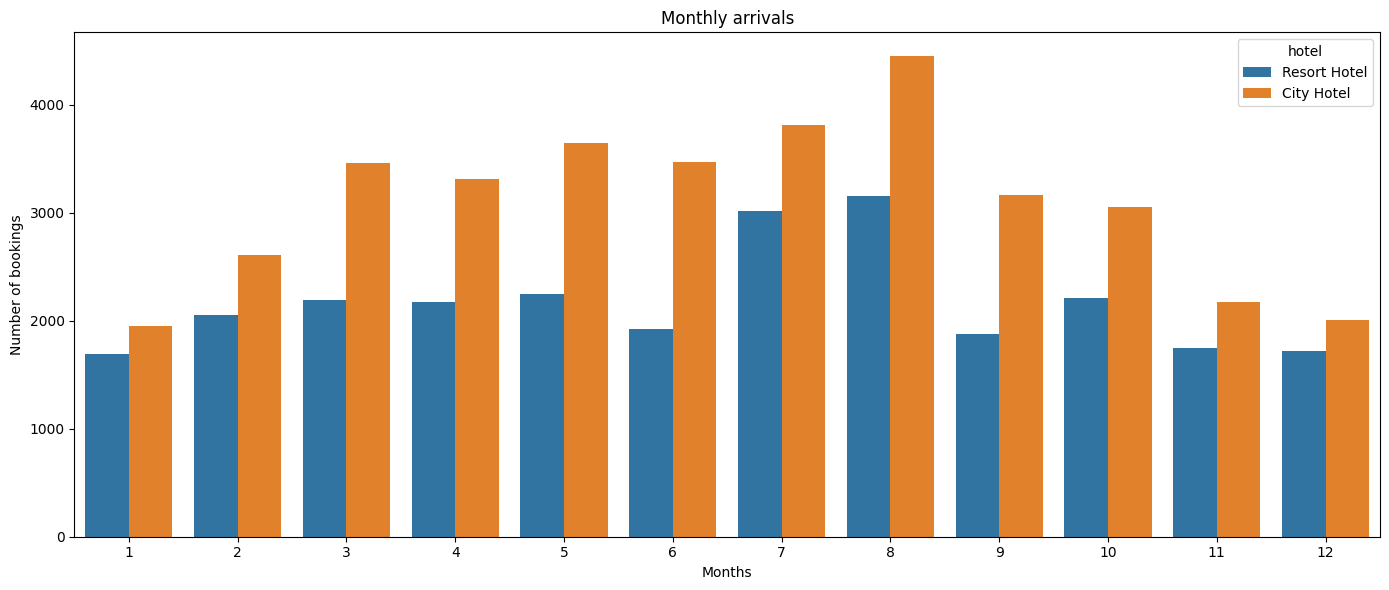

In [19]:
# Month with highest confirmed bookings

plt.figure(figsize = (14, 6))

sns.countplot(x = 'arrival_date_month', 
            data = confirmed_bookings, 
            hue = 'hotel', 
            )
plt.title('Monthly arrivals', )
plt.xlabel('Months')
plt.ylabel('Number of bookings')

plt.tight_layout()


July & August is the month with high number of guest for both hotel types

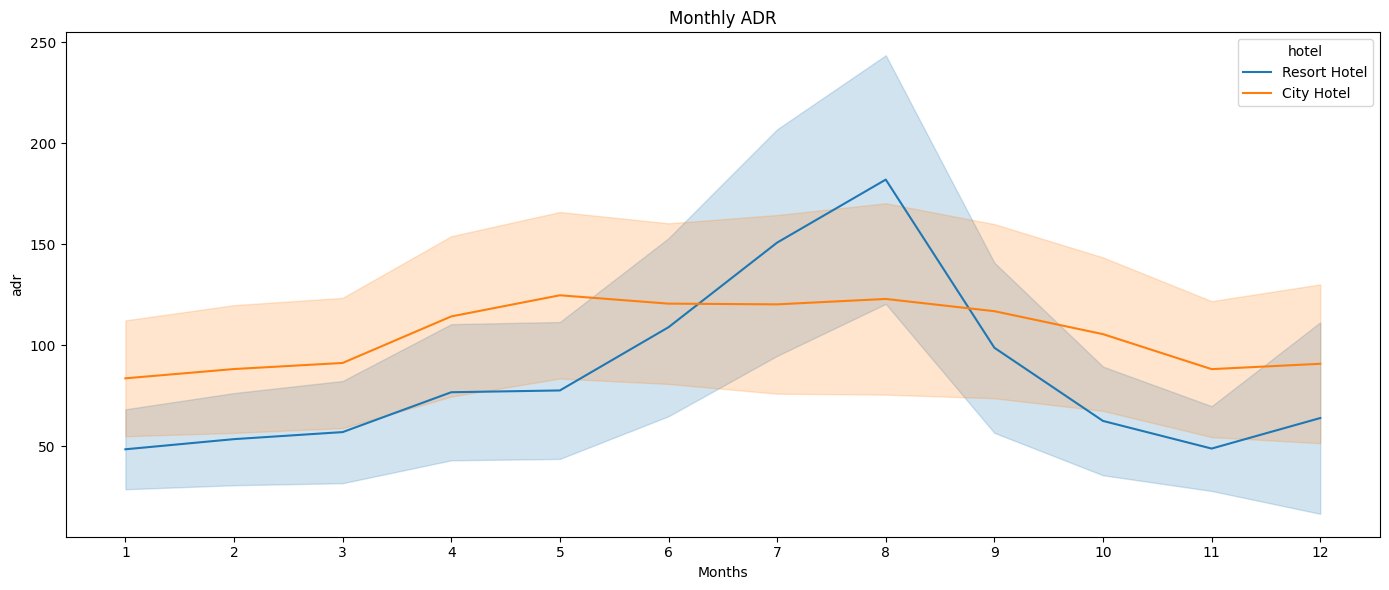

In [20]:
# ADR for the year

plt.figure(figsize = (14, 6))

months = confirmed_bookings['arrival_date_month'].unique()

sns.lineplot(x = 'arrival_date_month', 
            y = 'adr',
            hue = 'hotel', 
            data = confirmed_bookings, 
            errorbar = 'sd'
            )
plt.title('Monthly ADR')
plt.xlabel('Months')
plt.xticks(ticks = [m for m in months])

plt.tight_layout()


High adr for July & August due to holiday season and low adr for November - January due to winter season for the Resort Hotel. The spike of the adr in December is due to the Christmas holiday and new year.

High adr from April - September for city hotel.

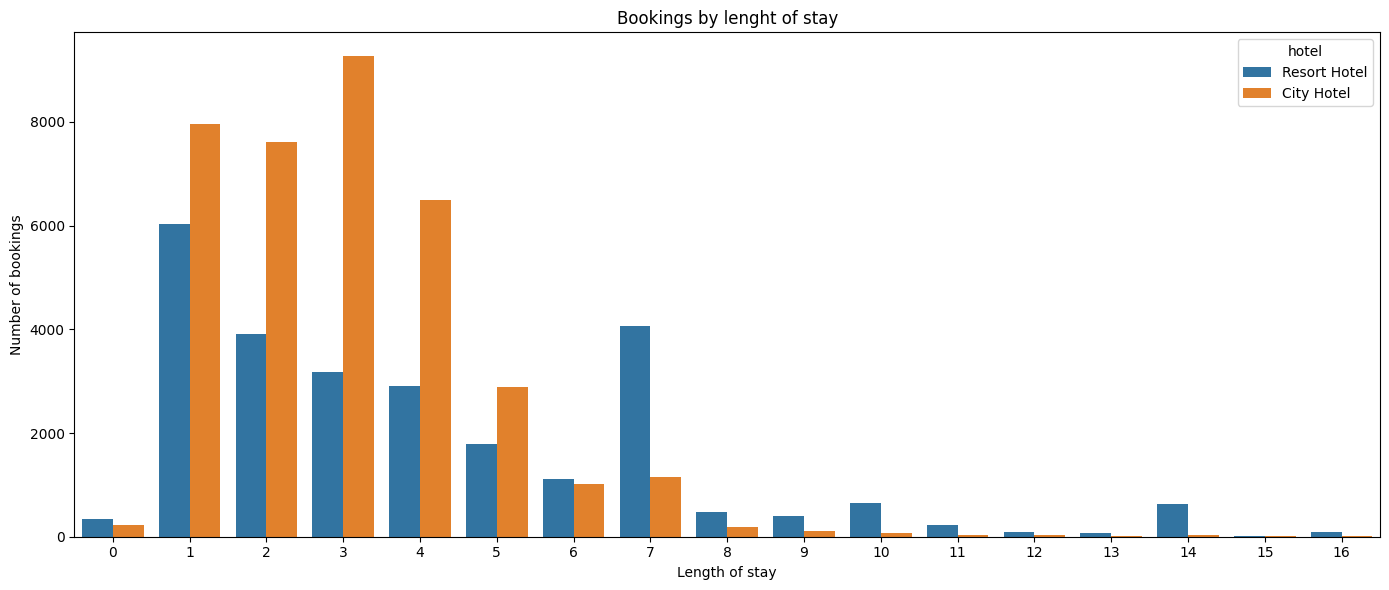

In [21]:
# Length of stay

plt.figure(figsize = (14, 6))

ax = sns.countplot(x = 'total_nights', 
                data = confirmed_bookings, 
                hue = 'hotel')
plt.title('Bookings by lenght of stay')
plt.xlabel('Length of stay')
plt.ylabel('Number of bookings')

plt.tight_layout()

Most of the bookings are for 1 - 4 days for the city hotel & 1 & 7 days for resort hotel

In [22]:
# Guest countries origin heatmaps

guest_country = df[df['is_canceled'] == '0'].groupby(['country']).size().reset_index(name = 'count')

guest_map = px.choropleth(guest_country,
                    locations = "country",
                    color= "count" ,
                    hover_name= "country", 
                    color_continuous_scale = "dense",
                    projection = 'equirectangular',
                    title="Guest Country"
             )

guest_map.show()

In [23]:
# Top 10 guest countries

guest_country.sort_values(['count'], ascending=False).head(20)

,country,count
125,PRT,17960
57,GBR,8428
54,FRA,7071
50,ESP,5372
42,DEU,4322
70,IRL,2345
75,ITA,1982
15,BEL,1657
113,NLD,1556
158,USA,1408


Based on the literature, the hotels' are situated in Portugal (PRT) hence the top rank of the visiting country & count. The top guests are mainly from around the Europe for both hotel types.

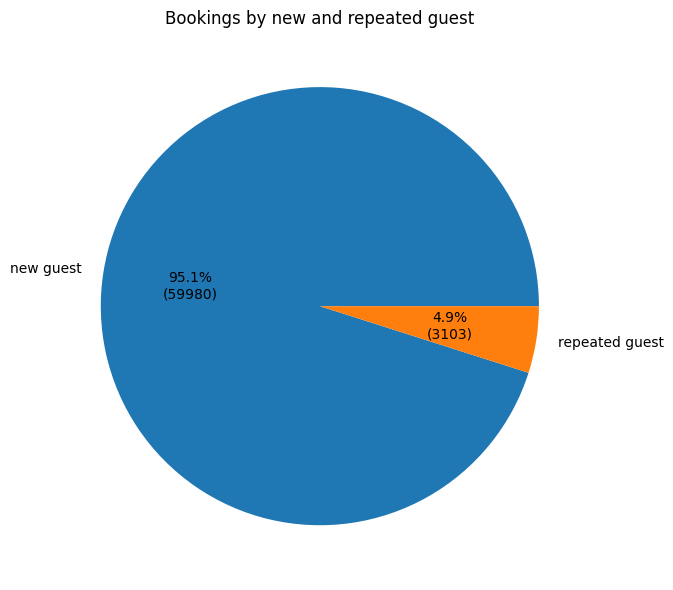

In [24]:
# Bookings made by returning guest and new guest

data = confirmed_bookings['is_repeated_guest'].value_counts()
labels = ['new guest', 'repeated guest']

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
fig, ax = plt.subplots(figsize =(14, 6))
ax.pie(data,
    autopct = lambda pct: func(pct, data),
    labels = labels,
    )

plt.title('Bookings by new and repeated guest')
plt.tight_layout()


<Figure size 1400x600 with 0 Axes>

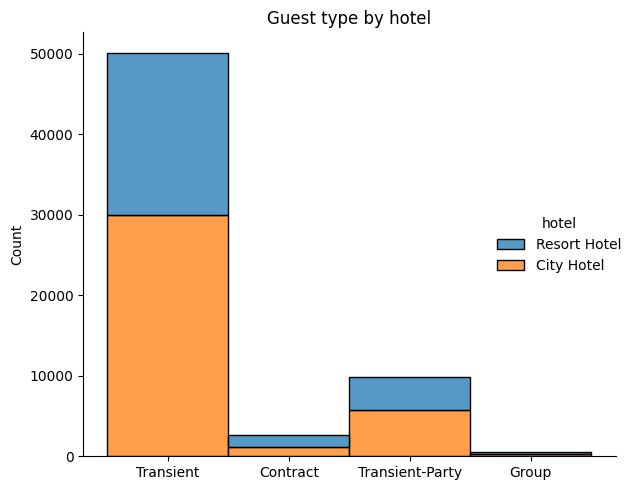

In [25]:
plt.figure(figsize = (14, 6))

sns.displot(confirmed_bookings, 
            x = 'customer_type', 
            hue = 'hotel', 
            multiple = 'stack', 
            ).set(xlabel = None)

plt.title('Guest type by hotel')

plt.tight_layout()

The guests are mainly new guest compared to repeated guest

As for the guest types, majority of the bookings are the transient type which refers to the case when the booking is not part of a group. It is followed by the transient-party customer type which is associated to at least the other transient booking, contract type & group. 

The definitions are per as described by the literature.

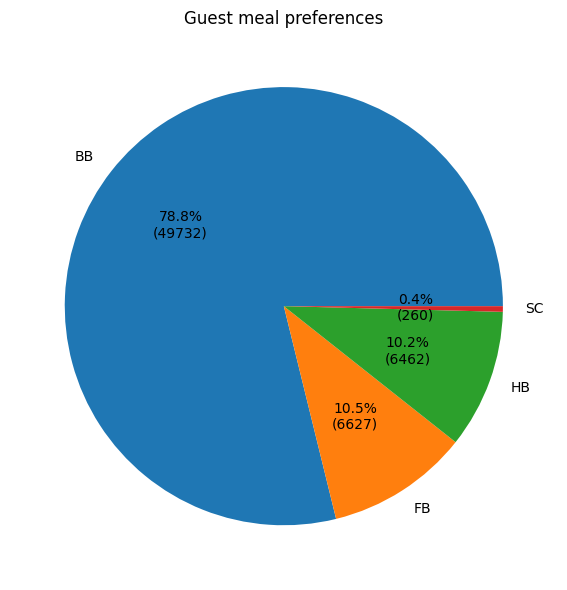

In [26]:
# Guest meal preference

labels = confirmed_bookings['meal'].unique()
data = confirmed_bookings['meal'].value_counts()

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
fig, ax = plt.subplots(figsize =(14, 6))
ax.pie(data,
    autopct = lambda pct: func(pct, data),
    labels = labels,
    )

plt.title('Guest meal preferences')
plt.tight_layout()

Majority guest prefer bed & breakfast (BB) followed by full board (FB), half board (HB) & self cater (SC)

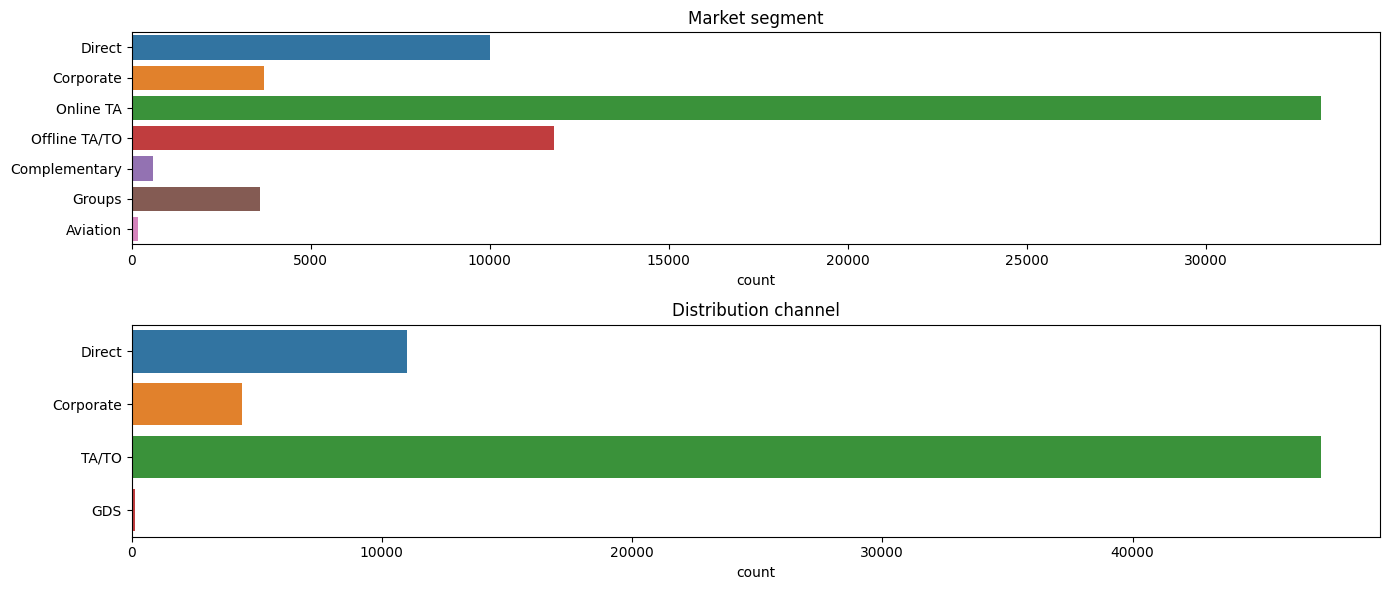

In [39]:
# Market segment & distribution channel

plt.figure(figsize = (14, 6))

plt.subplot(2,1,1)
sns.countplot(data = confirmed_bookings, y = 'market_segment', orient = "h").set(ylabel = None)
plt.title('Market segment')

plt.subplot(2,1,2)
sns.countplot(data = confirmed_bookings, y = 'distribution_channel', orient = "h").set(ylabel = None)
plt.title('Distribution channel')

plt.tight_layout()

The main market segment and distribution channel are through the travel agency (TA/TO), followed by the direct booking.

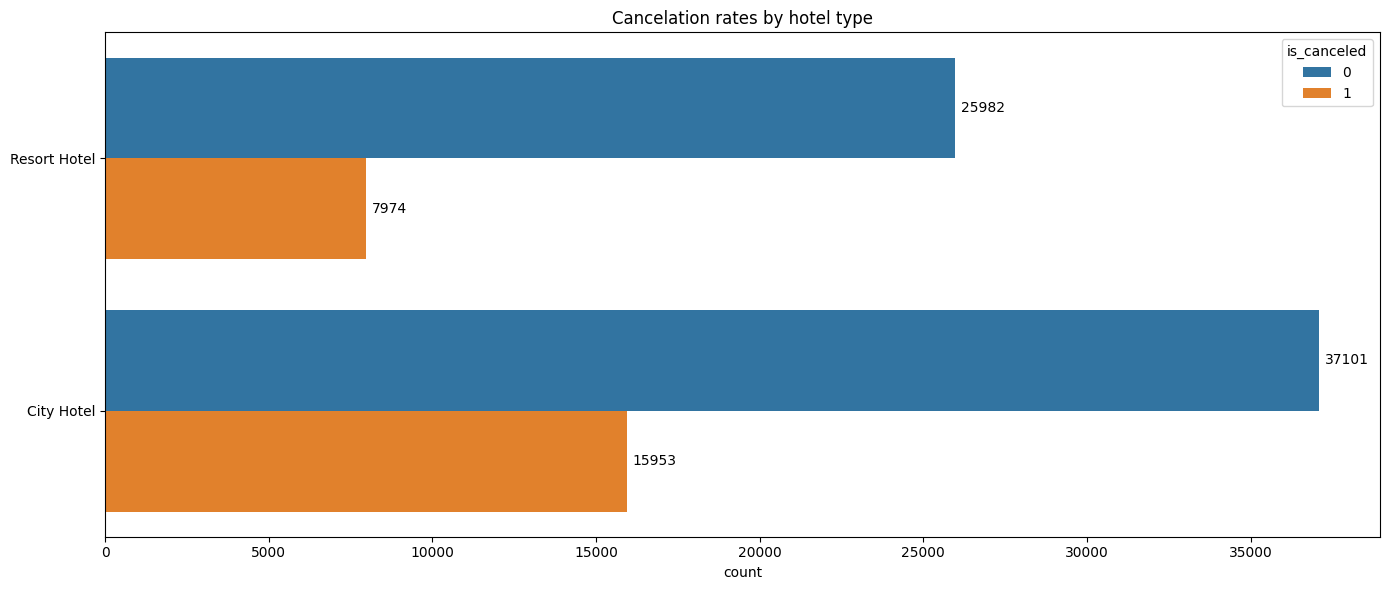

In [36]:
# Hotel cancelation rate

fig, ax = plt.subplots(figsize = (14, 6))

sns.countplot(ax = ax,
            y = 'hotel', 
            data = df, 
            hue = 'is_canceled',
            orient= 'h', 
            ).set(ylabel = None)
ax.bar_label(ax.containers[0], padding = 4)
ax.bar_label(ax.containers[1], padding = 4)            
plt.title('Cancelation rates by hotel type')

plt.tight_layout()

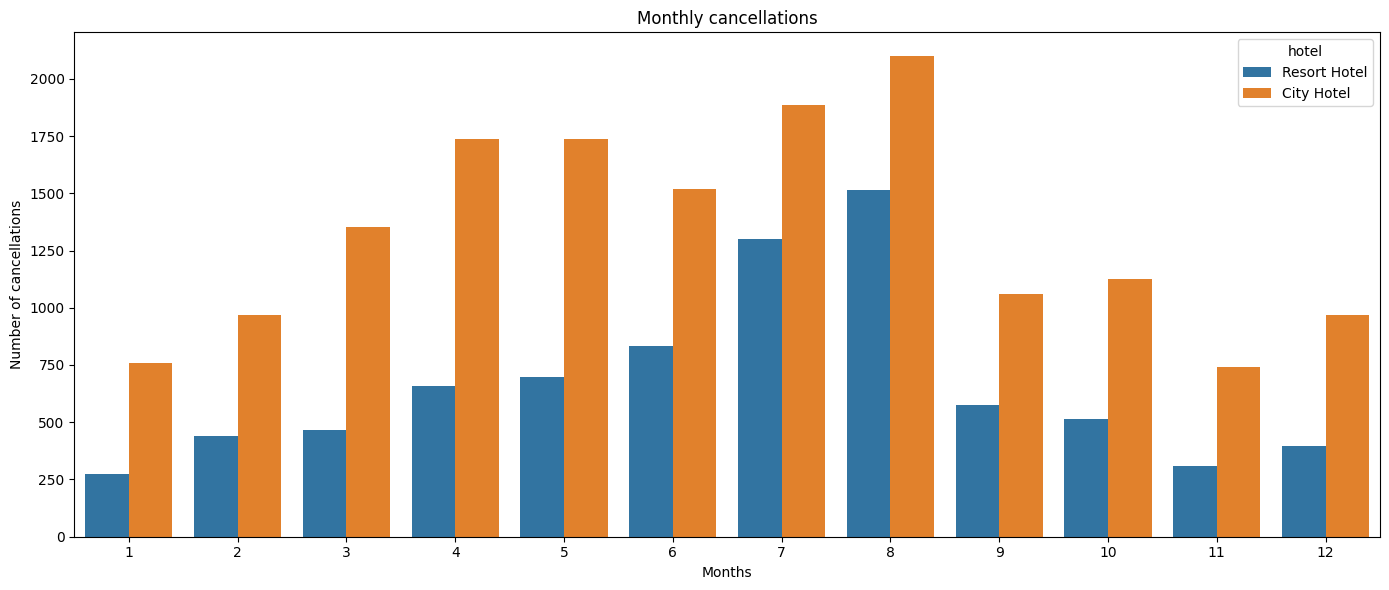

In [29]:
# Monthly cancellation

plt.figure(figsize = (14, 6))

sns.countplot(x = 'arrival_date_month', 
            data = canceled_bookings, 
            hue = 'hotel', 
            )
plt.title('Monthly cancelations', )
plt.xlabel('Months')
plt.ylabel('Number of cancelations')

plt.tight_layout()

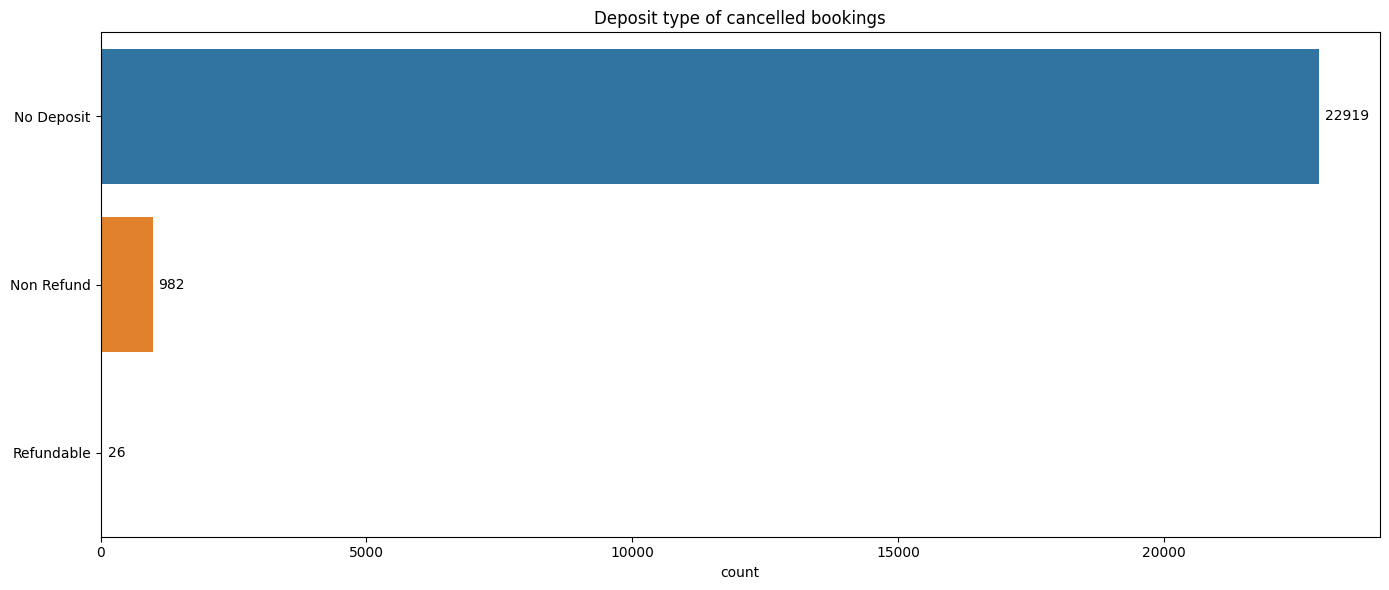

In [30]:
fig, ax = plt.subplots(figsize = (14, 6))

sns.countplot(ax = ax, 
            y = 'deposit_type', 
            data = canceled_bookings, 
            orient = "h",
            ).set(ylabel = None)
ax.bar_label(ax.containers[0], padding = 4)
plt.title('Deposit type of canceled bookings')

plt.tight_layout()

Primarily the overall cancelation is high for the city hotel with high cancelation rate in month July & August for both hotel types. It is also observed that the high cancelation is for no deposit bookings type.

### Summary

It is observed that the peak season is during the month 6 - 9. Based on the data analysis, high cancelation is driven by the booking deposit type even during the peak season especially month 7 & 8. However, it is viewed that the high cancelation rate does not affect the hotel business due to high adr and confirmed bookings during that period of time.

Referring to the guest types data, majority bookings are from new guests. Therefore, the bookings is viewed driven by the marketing, market segment & distribution channel in addition to the booking deposit types. This also provide the requirement for the hotel operator to improve promotion and engagement with existing or repeating guest.

The high online TA & offline TA & TO show significant contribution followed by the direct booking types. This shows that the direct distribution channel can also be the preferable booking and promotional channel to increase customer loyalty.